# SIS Epidemics on networks

In this notebook we demonstrate how to perform a SIS epidemic on a network.

In [1]:
import sys
sys.path.append('.')
sys.path.append('..')
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import animation
import networkx as nx
from SellkeSimulation.Simulation import complex_epidemic_simulation

We consider the following network for our first example

C:\Users\mfyles\AppData\Local\Continuum\anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


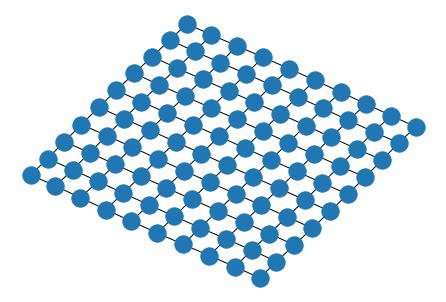

In [2]:
G = nx.grid_2d_graph(10,10)
nx.draw_kamada_kawai(G)

In [5]:
my_network_epidemic = complex_epidemic_simulation(G,
                                                  beta = 0.5,
                                                  infection_period_parameters = 1.5,
                                                  initial_infected = 1,
                                                  time_increment = 0.1,
                                                  max_iterations = 1000,
                                                 SIS = True)
my_network_epidemic.iterate_epidemic()

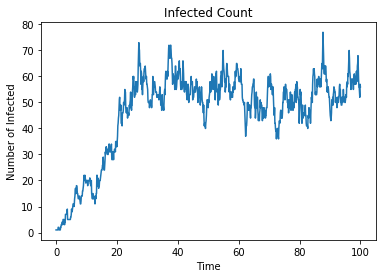

In [6]:
infected = my_network_epidemic.data_infected_counts
time = my_network_epidemic.data_time
plt.title("Infected Count")
plt.xlabel("Time")
plt.ylabel("Number of Infected")
plt.plot(time, infected)
plt.savefig("Epidemic_1.png")

In [8]:
my_network_epidemic.iteration

1000

We would like to see what the epidemic actually looks like as it is spreading across the network.

In [9]:
def get_color_map(i):
    color_map = []
    susceptible_nodes = my_network_epidemic.data_susceptible_nodes[i]
    infected_nodes = my_network_epidemic.data_infected_nodes[i]
    recovered_nodes = my_network_epidemic.data_recovered_nodes[i]
    for node in G:
        if node in infected_nodes:
            color_map.append('green')
        elif node in susceptible_nodes: color_map.append('blue')
            
    return color_map


In [10]:
def simple_update(num, layout, G, ax):
    ax.clear()
    G = nx.grid_2d_graph(10,10)
    # Draw the graph with random node colors
    color_map = get_color_map(num)
    nx.draw(G, pos=layout, node_color=color_map, ax=ax)

    # Set the title
    ax.set_title("Iteration {}".format(num))

In [11]:
def simple_animation():

    # Build plot
    fig, ax = plt.subplots(figsize=(6,4))

    # Create a graph and layout
    layout = nx.kamada_kawai_layout(G)

    ani = animation.FuncAnimation(fig, simple_update, 200, fargs=(layout, G, ax))
    ani.save('animation_1_epidemic_on_lattice.gif', writer='imagemagick')

    plt.show()


In [12]:
%%capture
simple_animation()

![SegmentLocal](animation_1_epidemic_on_lattice.gif "segment")